# 1. tensorflow v2.xx에서 v1사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2 비활성화하고 v1을 활성화

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 그래프 정의 (tensor 객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [2]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [3]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, 
                    dtype = tf.float16)
node2 = tf.constant(20,
                    dtype = tf.float16)
node3 = tf.add(node1, node2)

sess = tf.Session() # 활성화
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [4]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1, 2, 3]),
                    dtype = tf.int16)
node2 = tf.cast(node1, dtype = tf.float32) # 형변환
sess = tf.Session()
print(sess.run([node1, node2]))

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]


In [5]:
# 평균값 계산: tf.reduce_mean()
data = np.array([1., 2., 3., 4.])
m = tf.reduce_mean(data) # 실수
sess = tf.Session()
sess.run(m)

2.5

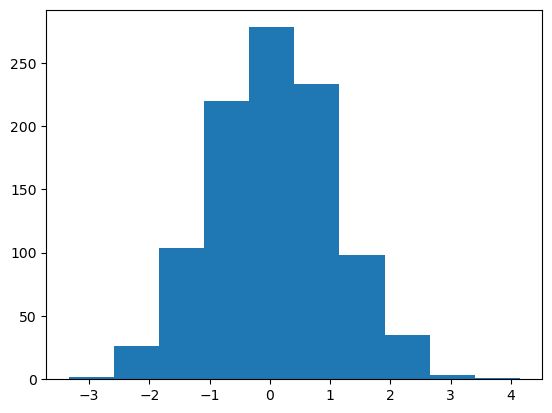

In [6]:
# tf.random_normal([size]): 평균 0, 표준편차 1인 난수 size개 발생. 
# 난수개수: 독립변수개수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000]) # 평균 0, 표준편차 1인 난수 2개 (정규분포)
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [7]:
# tensor 그래프(객체 흐름) 정의
# data set(x, y)
x = np.array([1, 2, 3])
y = np.array([1, 2, 3]) # y = 1*x + 0

# weight와 bias (처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random_normal([1]),
                name = 'bias')

# Hypothesis: 결과는 Numpy array
H = W*x + b

# cost function (손실함수 = mse: 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))

'''
학습 목적: cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선 위 미분값이 줄어드는 방향으로 학습(경사하강법)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()
# tf.Variable 변수 노드(W, b) 초기화
sess.run(tf.global_variables_initializer())
sess.run([W, b])

# 6000번 학습 (v2에서의 fit함수)
for step in range(1, 6000):
    _, cost_val, W_val, b_val, = sess.run([train, cost, W, b])
    if step % 300 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, 
                                                 cost_val, 
                                                 W_val,
                                                 b_val))

300번째 cost:4.793915309164731e-08, W:[0.9997457], b:[0.00057798]
600번째 cost:3.7930010017171376e-14, W:[0.99999976], b:[4.827022e-07]
900번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
1200번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
1500번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
1800번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
2100번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
2400번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
2700번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
3000번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
3300번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
3600번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
3900번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
4200번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
4500번째 cost:1.5000347020283425e-14, W:[0.9999998], b:

In [8]:
# 최종적으로 나온 회귀식 H = W*x + b
sess.run([W, b])

[array([0.9999998], dtype=float32), array([3.377597e-07], dtype=float32)]

In [9]:
W_, b_ = sess.run([W, b])
W_, b_

(array([0.9999998], dtype=float32), array([3.377597e-07], dtype=float32))

In [10]:
print('최종회귀식: H = {}*x + {}'.format(W_[0], b_[0]))

최종회귀식: H = 0.9999998211860657*x + 3.3775970109672926e-07


In [11]:
def to_predict(x):
    return W_[0]*x + b_[0]

In [12]:
to_predict(3)

2.999999801317898

## 2.2 predict을 하기 위한 placeholder 이용
- placeholder: 외부에서 데이터를 입력받을 수 있는 노드

In [13]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a, b)
sess = tf.Session()
sess.run([a, b, ab], feed_dict = {a:10, 
                                  b:20})

[array(10., dtype=float16), array(20., dtype=float16), 30.0]

In [14]:
sess.run(ab, feed_dict = {a:np.array([1, 2, 3]),
                          b:np.array([1, 2, 3])} )

array([2., 4., 6.], dtype=float16)

In [15]:
# data set (H = 2x + 1)
x_data = np.array([1, 2, 3, 5, 8])
y_data = np.array([3, 5, 7, 11, 17])

# placeholder 설정(X, y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random_normal([1]),
                name = 'bias')

# Hypothesis
H = W*x + b

# cost function == loss function 
cost = tf.reduce_mean(tf.square(H - y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(cost)

# session 생성 & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습 6000번
for step in range(10000):
    _, cost_, W_val, b_val = sess.run([train, cost, W, b], 
                                      feed_dict = {x:x_data,
                                                   y:y_data})
    if step % 300 == 0:
        print("{}/6000번째 cost:{}, W:{}, b:{}".format(step + 1,
                                                      cost_,
                                                      W_val, 
                                                      b_val))

1/6000번째 cost:24.80381965637207, W:[1.3966986], b:[-1.4573755]
301/6000번째 cost:1.085059404373169, W:[2.3563015], b:[-0.9044387]
601/6000번째 cost:0.7669531106948853, W:[2.2995558], b:[-0.6011225]
901/6000번째 cost:0.5421057939529419, W:[2.2518466], b:[-0.3461152]
1201/6000번째 cost:0.38317692279815674, W:[2.2117352], b:[-0.13172264]
1501/6000번째 cost:0.27084141969680786, W:[2.178013], b:[0.0485243]
1801/6000번째 cost:0.19143900275230408, W:[2.149661], b:[0.20006365]
2101/6000번째 cost:0.1353149712085724, W:[2.125825], b:[0.32746765]
2401/6000번째 cost:0.09564483910799026, W:[2.1057851], b:[0.4345802]
2701/6000번째 cost:0.06760473549365997, W:[2.088937], b:[0.5246333]
3001/6000번째 cost:0.047785162925720215, W:[2.0747724], b:[0.6003437]
3301/6000번째 cost:0.033776070922613144, W:[2.0628633], b:[0.66399574]
3601/6000번째 cost:0.02387402579188347, W:[2.0528517], b:[0.71751004]
3901/6000번째 cost:0.01687495969235897, W:[2.0444343], b:[0.76250106]
4201/6000번째 cost:0.011927863582968712, W:[2.0373573], b:[0.8003263

In [16]:
# 최종 W, b
sess.run([W, b])

[array([2.0013094], dtype=float32), array([0.9930109], dtype=float32)]

In [17]:
# 예측하기
sess.run(H, feed_dict = {x:5})

array([10.9995575], dtype=float32)

In [18]:
sess.run(H, feed_dict = {x:np.array([5, 6, 7])})

array([10.9995575, 13.000867 , 15.002176 ], dtype=float32)

## 2.3 scale이 다른 데이터들의 linear regression 구현(scale 조정 X)

In [19]:
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])

# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random.normal([1]),
                name = 'bias')

# Hypothesis
H = W*x + b

# cost function(loss fucntion; 손실함수)
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict = {x:x_data,
                                                                           y:y_data})
    if step % 300 == 1:
        print('{}/6000번째 cost:{}, W:{}, b:{}'.format(step,
                                                       cost_val,
                                                       W_val,
                                                       b_val))

1/6000번째 cost:4408.1328125, W:[-0.590837], b:[1.176464]
301/6000번째 cost:79.20587921142578, W:[10.096634], b:[0.23687983]
601/6000번째 cost:79.14129638671875, W:[10.149323], b:[-0.1532479]
901/6000번째 cost:79.13948822021484, W:[10.158107], b:[-0.21828184]
1201/6000번째 cost:79.13945007324219, W:[10.159571], b:[-0.22912295]
1501/6000번째 cost:79.13945007324219, W:[10.159815], b:[-0.23093046]
1801/6000번째 cost:79.13945770263672, W:[10.159856], b:[-0.23123084]
2101/6000번째 cost:79.13945007324219, W:[10.159862], b:[-0.23127861]
2401/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
2701/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
3001/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
3301/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
3601/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
3901/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
4201/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
4501

In [20]:
# 예측
sess.run(H, feed_dict = {x:5})

array([50.568027], dtype=float32)

In [21]:
# cost값이 멈춤: local 최솟값

## 2.4 scale이 다른 데이터들의 linear regression 구현(scale 조정 O)
### scale 맞추기: 모든 데이터를 일정 범위 내로 조정
- normalization(정규화): 데이터의 최댓값을 1, 최솟값을 0으로 변환
```
                         x - Xmin
    normalization =  ───────────────
                       Xmax - Xmin
```
    * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.MinMaxScaler이용)
- standardization(표준화): 데이터의 평균을 0, 표준편차를 1로 조정
```
                         x - Xmean(평균)
    standardization = ────────────────────
                          Xstd(표준편차)
```
   * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.StandardScaler이용)

In [24]:
# 라이브러리를 쓰지 않고 정규화: 예측할 경우 x데이터를 스케일 변환하고, 스케일된 예측값을 변환이 번거로워
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])

scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())
print(scaled_x_data), 
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.1        0.7        0.83333333 1.        ]


In [27]:
x = (5 - x_data.min()) / (x_data.max() - x_data.min())
x

0.4444444444444444

In [29]:
0.7 * (y_data.max() - y_data.min())+y_data.min()

68.0

In [36]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 표준화시킬 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)

scaler_y = MinMaxScaler() # y_data를 표준화시킬 객체
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)

np.column_stack([x_data, scaled_x_data, y_data, scaled_y_data])

array([[ 1.        ,  0.        ,  5.        ,  0.        ],
       [ 2.        ,  0.11111111, 14.        ,  0.1       ],
       [ 5.        ,  0.44444444, 68.        ,  0.7       ],
       [ 8.        ,  0.77777778, 80.        ,  0.83333333],
       [10.        ,  1.        , 95.        ,  1.        ]])

In [39]:
# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random.normal([1]),
                name = 'bias')

# Hypothesis
H = W*x + b

# cost function(loss fucntion; 손실함수)
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict = {x:scaled_x_data,
                                                                           y:scaled_y_data})
    if step % 300 == 1:
        print('{}/6000번째 cost:{}, W:{}, b:{}'.format(step,
                                                       cost_val,
                                                       W_val,
                                                       b_val))

1/6000번째 cost:0.6505422592163086, W:[0.7183061], b:[-0.60048044]
301/6000번째 cost:0.15338514745235443, W:[0.89261144], b:[-0.2653037]
601/6000번째 cost:0.042181190103292465, W:[0.9740627], b:[-0.10627314]
901/6000번째 cost:0.017298921942710876, W:[1.0116688], b:[-0.03058098]
1201/6000번째 cost:0.011724498122930527, W:[1.0285989], b:[0.00566603]
1501/6000번째 cost:0.010469479486346245, W:[1.03581], b:[0.02322836]
1801/6000번째 cost:0.010181603953242302, W:[1.0384789], b:[0.03192583]
2101/6000번째 cost:0.010110976174473763, W:[1.0390487], b:[0.03640451]
2401/6000번째 cost:0.010089753195643425, W:[1.038673], b:[0.03886336]
2701/6000번째 cost:0.010080283507704735, W:[1.0378939], b:[0.04034399]
3001/6000번째 cost:0.010074061341583729, W:[1.0369626], b:[0.04134055]
3301/6000번째 cost:0.010069089010357857, W:[1.035997], b:[0.04208881]
3601/6000번째 cost:0.010064876638352871, W:[1.035055], b:[0.04270076]
3901/6000번째 cost:0.010061236098408699, W:[1.0341524], b:[0.04323026]
4201/6000번째 cost:0.010058080777525902, W:[1.

In [40]:
# 예측
scaled_input = scaler_x.transform(np.array([[2]]))
print("2를 스케일 조정된 값:", scaled_input)
scaled_output = sess.run(H, feed_dict = {x:scaled_input})
print('예측값:', scaler_y.inverse_transform(scaled_output))

2를 스케일 조정된 값: [[0.11111111]]
예측값: [[19.598568]]


In [47]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict = {x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
y_hat
np.column_stack([y_data, y_hat])

array([[  5.        ,   9.35339069],
       [ 14.        ,  19.59856796],
       [ 68.        ,  50.33410263],
       [ 80.        ,  81.06964111],
       [ 95.        , 101.55998993]])

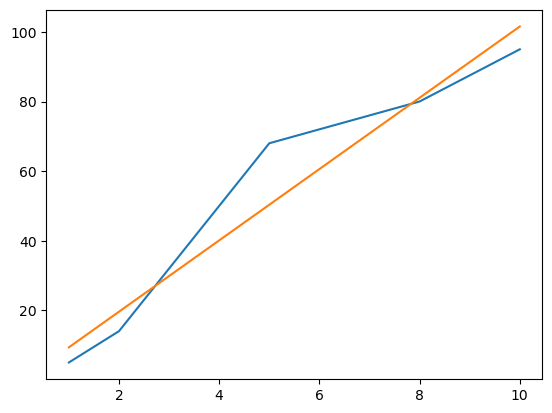

In [50]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.plot(x_data, y_hat)
plt.show()

In [63]:
x_data, x_data.ravel(), x_data[:, 0], x_data.flatten()

(array([[ 1],
        [ 2],
        [ 5],
        [ 8],
        [10]]),
 array([ 1,  2,  5,  8, 10]),
 array([ 1,  2,  5,  8, 10]),
 array([ 1,  2,  5,  8, 10]))

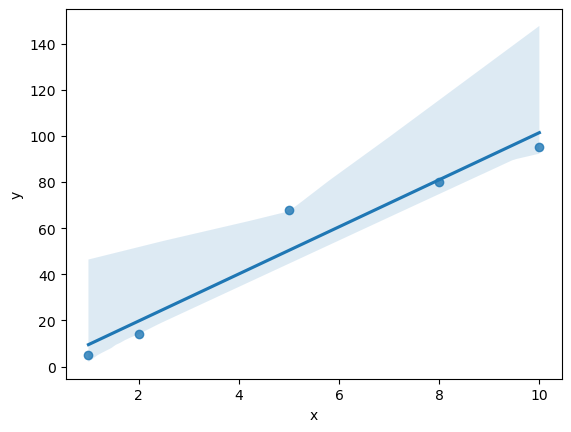

In [61]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':x_data[:, 0],
                   'y':y_data.ravel()})
sns.regplot(data = df,
            x = 'x', 
            y = 'y')
plt.show()

In [67]:
# 라이브러리를 쓰지 않고 표준화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
scaled_x_data = (x_data - x_data.mean()) / x_data.std()
scaled_y_data = (y_data - y_data.mean()) / y_data.std()
print(scaled_x_data, scaled_y_data)

[-1.22474487 -0.93313895 -0.05832118  0.81649658  1.39970842] [-1.31049277 -1.06166503  0.43130142  0.76307174  1.17778464]


In [88]:
# 라이브러리를 써서 표준화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)

print(np.column_stack([x_data, scaled_x_data]))
print(np.column_stack([y_data, scaled_y_data]))

[[ 1.         -1.22474487]
 [ 2.         -0.93313895]
 [ 5.         -0.05832118]
 [ 8.          0.81649658]
 [10.          1.39970842]]
[[ 5.         -1.32373476]
 [15.         -1.04563922]
 [68.          0.42826713]
 [80.          0.76198177]
 [95.          1.17912508]]


In [89]:
# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random.normal([1]),
                name = 'bias')

# Hypothesis
H = W*x + b

# cost function(loss fucntion; 손실함수)
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict = {x:scaled_x_data,
                                                                           y:scaled_y_data})
    if step % 1000 == 1:
        print('{}/6000번째 cost:{}, W:{}, b:{}'.format(step,
                                                       cost_val,
                                                       W_val,
                                                       b_val))

1/6000번째 cost:2.6605920791625977, W:[0.19951056], b:[1.4168292]
1001/6000번째 cost:0.10862330347299576, W:[0.8649956], b:[0.19136333]
2001/6000번째 cost:0.06206921488046646, W:[0.95487875], b:[0.02584639]
3001/6000번째 cost:0.0612199604511261, W:[0.96701896], b:[0.00349093]
4001/6000번째 cost:0.0612044632434845, W:[0.96865875], b:[0.0004715]
5001/6000번째 cost:0.061204176396131516, W:[0.96887827], b:[6.3683685e-05]
6001/6000번째 cost:0.06120417267084122, W:[0.9688999], b:[8.607878e-06]
7001/6000번째 cost:0.06120418384671211, W:[0.9688999], b:[1.1696594e-06]
8001/6000번째 cost:0.06120417267084122, W:[0.9688999], b:[1.6552718e-07]
9001/6000번째 cost:0.061204176396131516, W:[0.9688999], b:[4.1249795e-08]


## 2.5 독립변수 x가 여러개인 linear Regression

## csv를 array로 읽어오기

In [99]:
# sol 1
# 1. csv를 dataFrame 읽어와
data = pd.read_csv('data/ozone.csv')
# 2. 결측치 대체 or 삭제
# data.fillna(value = data.mean(), inplace = True)
data.dropna(how = 'any', axis = 0, inplace = True)
X = data[['Solar.R', 'Wind', 'Temp']].values
y = data['Ozone'].values
X.shape, y.shape

((111, 3), (111,))

In [103]:
# sol 2
# data = np.loadtxt('data/ozone_nonan.csv', delimiter = ',') # NAN 없어야 함
data = np.genfromtxt('data/ozone.csv', 
                     delimiter = ',',
                     skip_header = 1,
                     missing_values = 'NA',
                     filling_values = np.nan)
data

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [  nan, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6